In [ ]:
#Major Project 1 -->CLASSIFIER/REGRESSION

In [ ]:
#Support vector Classifier (SVC model)
#dataset - neg pos dataset 
#dataset - https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/amazonreviews.tsv

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/amazonreviews.tsv',sep='\t')
df

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
df.shape #10000 rows and 2 cols

(10000, 2)

In [ ]:
df.size # total number of elements in the dataframe

20000

In [ ]:
#I just want to know how many neg and pos reviews are there
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

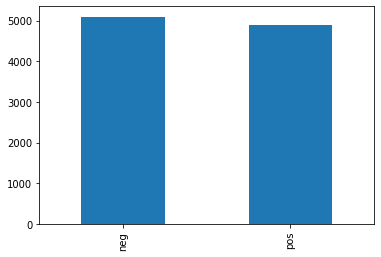

In [ ]:
df['label'].value_counts().plot(kind = 'bar')

In [ ]:
#4.divide the data into input and output
x = df.iloc[:,1].values#only when text reviews are involved ,i/p is 1 dimensional
y = df.iloc[:,0].values
print(x)
print(y)

['Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'
 "The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."
 'Amazing!: This soundtrack is my favorite music of all t

In [ ]:
#5.train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
#6.Apply TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [ ]:
#7.Apply CLASSIFIER/REGRESSOR/CLUSTERER
from sklearn.svm import SVC
model = SVC()

In [ ]:
#8.model fitting
model.fit(x_train_v,y_train)

SVC()

In [ ]:
#9.Predictor variable/predict the output
y_pred = model.predict(x_test_v)
y_pred #Predicted values

array(['neg', 'pos', 'neg', ..., 'neg', 'neg', 'pos'], dtype=object)

In [ ]:
y_test # actual values

array(['neg', 'pos', 'neg', ..., 'pos', 'neg', 'pos'], dtype=object)

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

87.88

In [ ]:
#Evaluating a specific review
a = df['review'][4]
a

"Remember, Pull Your Jaw Off The Floor After Hearing it: If you've played the game, you know how divine the music is! Every single song tells a story of the game, it's that good! The greatest songs are without a doubt, Chrono Cross: Time's Scar, Magical Dreamers: The Wind, The Stars, and the Sea and Radical Dreamers: Unstolen Jewel. (Translation varies) This music is perfect if you ask me, the best it can be. Yasunori Mitsuda just poured his heart on and wrote it down on paper."

In [ ]:
a = vect.transform([a])
model.predict(a)

array(['neg'], dtype=object)

In [ ]:
b = df['review'][12] #12th index from the review column
b

'Great Read: I thought this book was brilliant, but yet realistic. It showed me that to error is human. I loved the fact that this writer showed the loving side of God and not the revengeful side of him. I loved how it twisted and turned and I could not put it down. I also loved The glass castle.'

In [ ]:
b = vect.transform([b])
model.predict(b)

array(['pos'], dtype=object)

In [ ]:
#Evaluating by taking custom review
c = 'Quality is not good'
c

'Quality is not good'

In [ ]:
c = vect.transform([c])
model.predict(c)

array(['neg'], dtype=object)

In [ ]:
d='quick and easy to deal'
d

'quick and easy to deal'

In [ ]:
d=vect.transform([d])
model.predict(d)

array(['pos'], dtype=object)

In [ ]:
#1.Gather data and divide into i/p and o/p
#2.Applied train_test_split
#3.Applied TfidfVectorizer
#4.Apply SVC
#5.Predicted the output

In [ ]:
#If ever I have to deploy my model,I will have to perform pipelining
#Pipelining - Combining of 2 or more modules
#So here we want to combine/pipeline TdidfVectorizer and SVC

In [ ]:
#Pipelining
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
#predictor varibale
y_pred1 = text_model.predict(x_test)
y_pred1 # these are predicted outputs for pipelined model

array(['neg', 'pos', 'neg', ..., 'neg', 'neg', 'pos'], dtype=object)

In [ ]:
y_test #Actual output

array(['neg', 'pos', 'neg', ..., 'pos', 'neg', 'pos'], dtype=object)

In [ ]:
#To check the accuracy of the pipelined model
accuracy_score(y_pred1,y_test)*100

87.88

In [ ]:
#Individual Prediction/Evaluation of a specific review
a1 = df['review'][2]
a1

'Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the more if you\'ve played the game) and the hope in "A Distant Promise" and "Girl who Stole the Star" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like "Chrono Cross ~ Time\'s Scar~", "Time of the Dreamwatch", and "Chronomantique" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer\'s work (I haven\'t heard the Xenogears soundtrack, so I can\'t say for sure), and even if you\'ve never played the game, it would be worth twice the price to buy it.I wish I could give it 6 stars.'

In [ ]:
text_model.predict([a1])

array(['pos'], dtype=object)

In [ ]:
#JOBLIB  - 2 different types - 1.Dump and 2.Load
import joblib
joblib.dump(text_model,'neg-pos')
#We are creating a newfile called neg-pos and we are dumping our pipelined model
#inside it.

['neg-pos']

In [ ]:
#We are creating a STREAMLIT WEB APPLICATION

In [ ]:
#Deployment are of 2 types
#1.Temporary deployment
#2.Permanent deployment

In [ ]:
#Temporary deployment - Local host

In [ ]:
!pip install streamlit --quiet #Installing the streamlit library

     |████████████████████████████████| 9.1 MB 5.2 MB/s 
     |████████████████████████████████| 164 kB 51.9 MB/s 
     |████████████████████████████████| 235 kB 45.0 MB/s 
     |████████████████████████████████| 78 kB 7.0 MB/s 
     |████████████████████████████████| 181 kB 60.9 MB/s 
     |████████████████████████████████| 4.7 MB 42.1 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 51 kB 5.5 MB/s 


In [ ]:
%%writefile app.py 
#%%writefile is amagic command to create app.py file
import streamlit as st
import joblib
model = joblib.load('neg-pos')
st.title('NEG-POS CLASSIFIER')#creates a title in web app
ip = st.text_input('Enter the review') #creates a text box in web app
op = model.predict([ip])
if st.button('Predict'):
  st.title(op[0]) # st.button will create a button with name Predict
  #st.title(op[0]) # the output will be displayed as a title

Writing app.py


In [ ]:
#TEMPORARY DEPLOYMENT PART
!streamlit run app.py & npx localtunnel --port 8501
#8501 is the default port number for local tunnel

2022-09-06 06:02:06.181 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.74.89.219:8501

npx: installed 22 in 4.891s
your url is: https://silly-sides-appear-34-74-89-219.loca.lt
